In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Sandip Dhakal
import pandas as pd
import numpy as np

In [8]:
data=pd.read_csv("/content/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
print("\nData Types:")
print(data.dtypes)



Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [10]:
# Check for missing values in each column.
missing_info = data.isnull().sum() / len(data) * 100
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:

# Summary statistics for numerical columns.
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        print(f"\nSummary Statistics for {column}:")
        print(data[column].describe())
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics for Pregnancies:
count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

Summary Statistics for Glucose:
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

Summary Statistics for BloodPressure:
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Summary Statistics for SkinThickness:
count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

Summary Statistics for Insulin:
count    768.000000
mean      79.799479
std

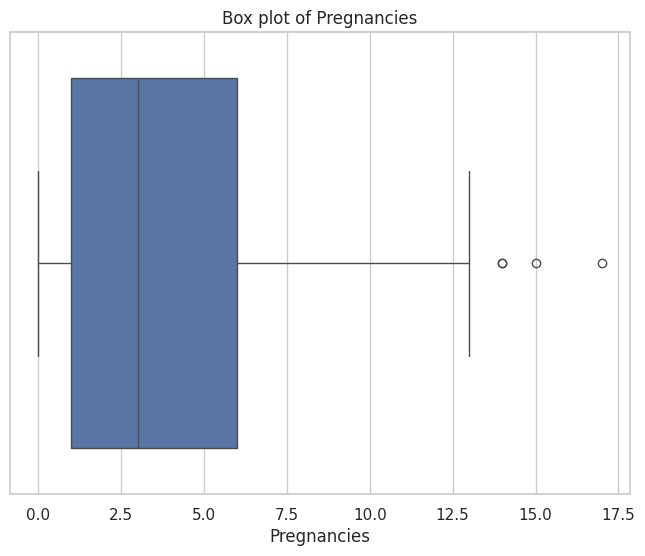

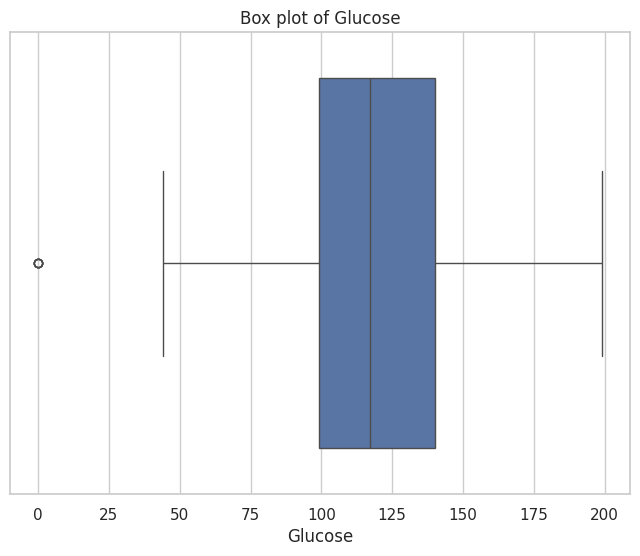

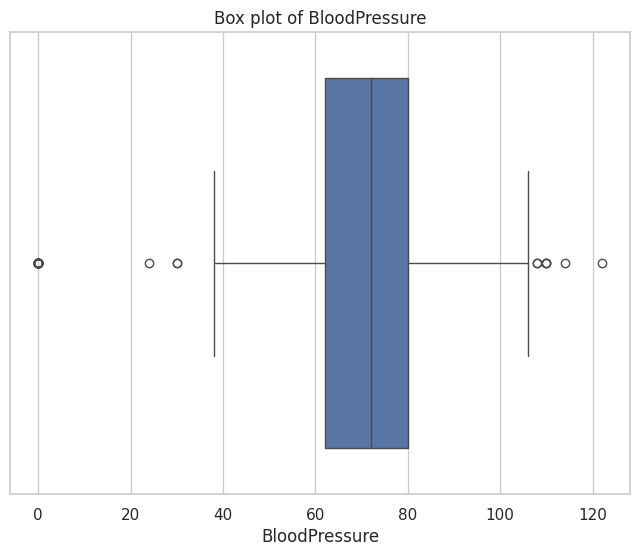

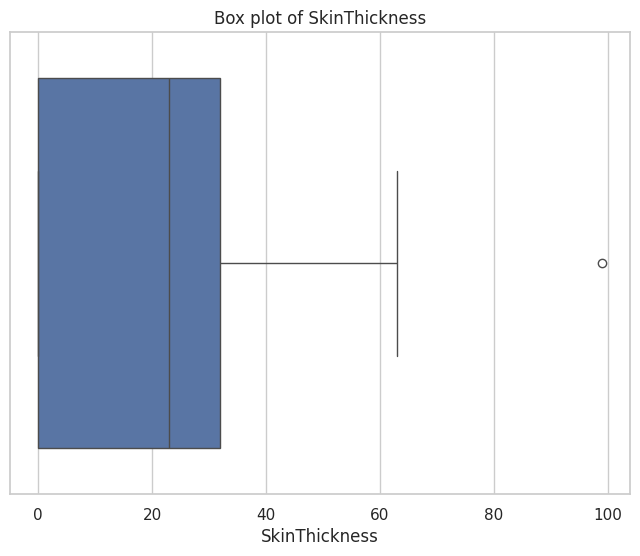

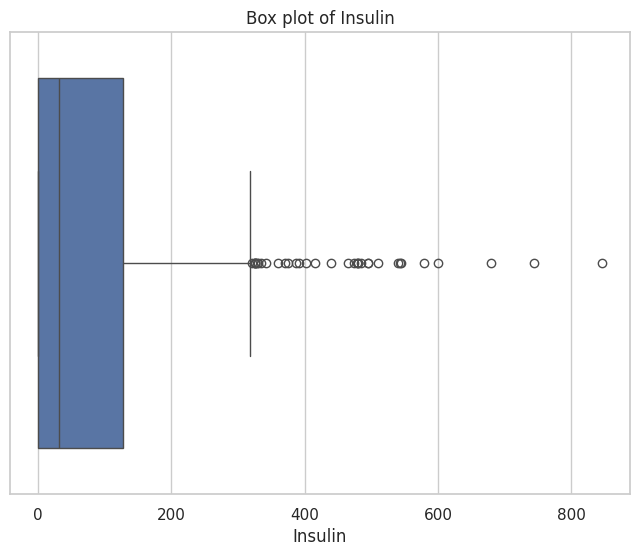

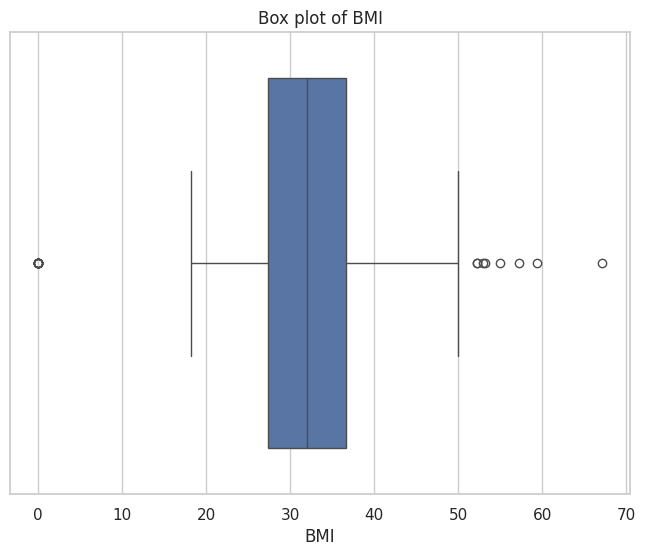

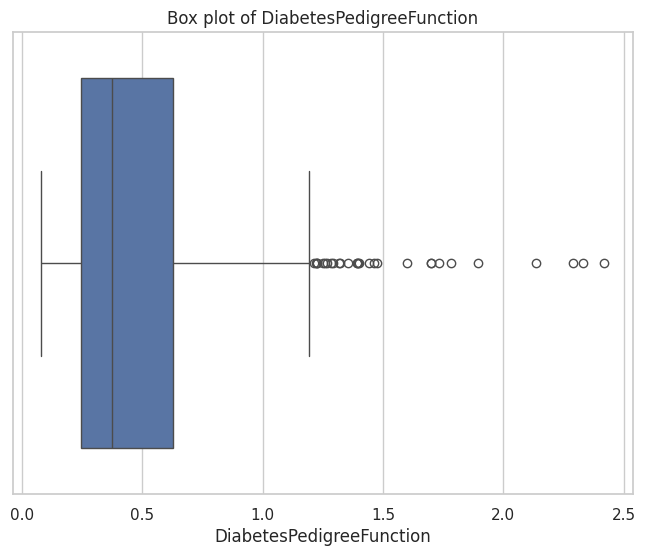

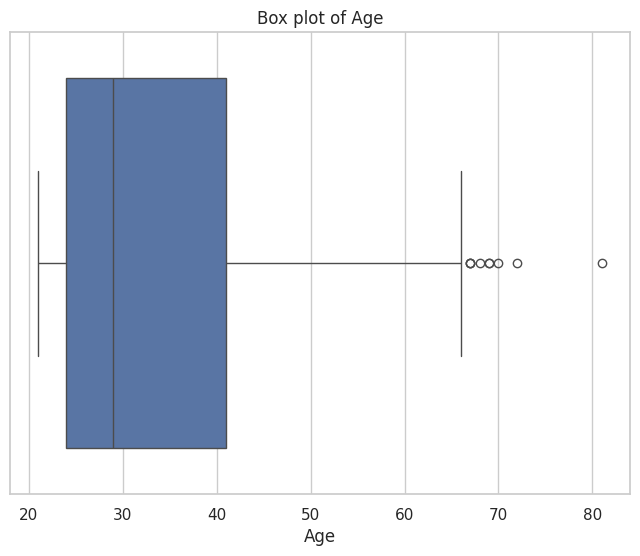

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


# Function to create box plots for each numerical column
def plot_boxplots(data, columns):
    """Generates box plots for specified numerical columns in a DataFrame.
    Args:
        data: The Pandas DataFrame containing the data.
        columns: A list of numerical column names to plot.
    """

    for col in columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[col])
        plt.title(f'Box plot of {col}')
        plt.show()

# Create boxplots
plot_boxplots(data, numerical_cols)

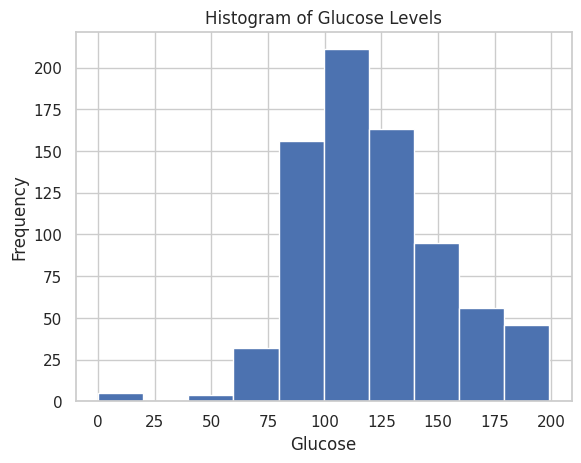

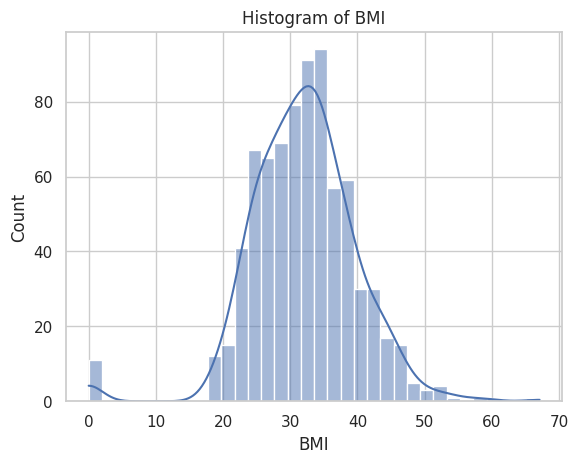

In [13]:
# Build Histograms  appropriate columns
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(data['Glucose'], bins=10)
plt.title('Histogram of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data['BMI'], kde=True)
plt.title('Histogram of BMI')
plt.show()

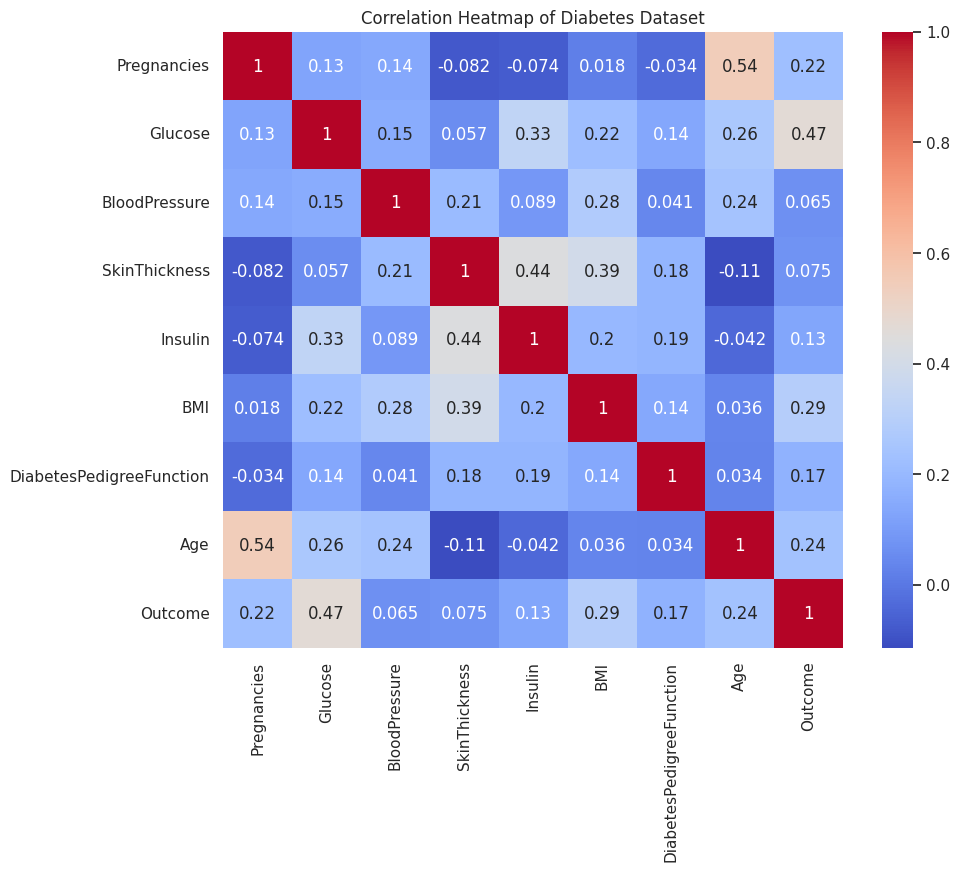

In [14]:

# Build Heatmaps for appropriate columns
correlation_matrix = data.corr()  # Calculate the correlation matrix

plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

In [15]:

#X = complete code
#y = complete code

X = data.drop('Outcome', axis=1).values  # Features (all columns except 'Outcome')
y = data['Outcome'].values  # Target variable ('Outcome' column)


In [16]:

import numpy as np

def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
   """Splits dataset into train and test sets."""

   np.random.seed(random_seed)
   indices = np.arange(X.shape[0])
   np.random.shuffle(indices)

   split_index = int(len(X) * (1 - test_size))  # Calculate split index
   X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
   y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]

   return X_train, X_test, y_train, y_test

In [17]:
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.

    Arguments:
    point1 : np.ndarray
        The first point as a numpy array.
    point2 : np.ndarray
        The second point as a numpy array.

    Returns:
    float
        The Euclidean distance between the two points.

    Raises:
    ValueError: If the input points do not have the same dimensionality.
    """

    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")

    distance = np.sqrt(np.sum((point1 - point2)**2))
    return distance

In [18]:

try:
    point1 = np.array([3, 4])
    point2 = np.array([0, 0])

    result = euclidean_distance(point1, point2)

    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"

    print("Test passed successfully!")
except ValueError as ve:
    print(f"ValueError: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Test passed successfully!


In [19]:

def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm.

    Arguments:
    query : np.ndarray
        The query point for which the prediction is to be made.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    int
        The predicted class label for the query.
    """

    distances = [euclidean_distance(query, x) for x in X_train]

    sorted_indices = np.argsort(distances)

    nearest_indices = sorted_indices[:k]

    nearest_labels = y_train[nearest_indices]

    prediction = np.bincount(nearest_labels).argmax()

    return prediction

In [20]:
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.

    Arguments:
    X_test : np.ndarray
        The test feature matrix.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    np.ndarray
        An array of predicted class labels for the test samples.
    """

    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

In [21]:
try:
    X_test_sample = X_test[:5]
    y_test_sample = y_test[:5]

    predictions = knn_predict(X_test_sample, X_train, y_train, k=3)  # Make predictions

    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)

    assert predictions.shape == y_test_sample.shape, (
        "The shape of predictions does not match the shape of the actual labels."
    )

    print("Test case passed successfully!")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

An unexpected error occurred: name 'X_test' is not defined


In [22]:
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.

    Arguments:
    y_true : np.ndarray
        The true labels.
    y_pred : np.ndarray
        The predicted labels.

    Returns:
    float
        The accuracy as a percentage (0 to 100).
    """
    correct_predictions = np.sum(y_true == y_pred)  # Count correct predictions
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100  # Calculate accuracy
    return accuracy

try:
    predictions = knn_predict(X_test, X_train, y_train, k=3)
    accuracy = compute_accuracy(y_test, predictions)
    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")

An unexpected error occurred during prediction or accuracy computation: name 'X_test' is not defined


In [23]:
import matplotlib.pyplot as plt

def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
    Run KNN predictions for different values of k and plot the accuracies.

    Arguments:
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    X_test : np.ndarray
        The test feature matrix.
    y_test : np.ndarray
        The test labels.
    k_values : list of int
        A list of k values to experiment with.

    Returns:
    dict
        A dictionary with k values as keys and their corresponding accuracies as values.
    """
    accuracies = {}

    for k in k_values:
        predictions = knn_predict(X_test, X_train, y_train, k)  # Make predictions for current k
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        print(f"Accuracy for k={k}: {accuracy:.2f}%")

    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.show()

    return accuracies

k_values = range(1, 21)

try:
    accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")

An unexpected error occurred during the experiment: name 'X_train' is not defined
